### Baseline Modeling for Grit Classification

#### Goal:
We have survey data with multiple question responses (features) and a categorical grit label (target class).  
In this notebook, we will:

1. Load and inspect the dataset.
2. Build simple baseline classification models to predict the grit class:
   - A dummy classifier that always predicts the majority class.
   - A standard Logistic Regression model (the classification equivalent of linear regression).
3. Evaluate these models using appropriate classification metrics (Accuracy, Precision, Recall, F1-score).
4. Establish a baseline performance that we will improve later using feature engineering and feature selection.


#### Importing required libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt


#### Loading the Dataset

In [3]:
df = pd.read_csv('data/engineered_grit_data.csv')
df.head()

,surveyelapse,VCL1,VCL2,VCL3,VCL4,VCL5,VCL7,VCL8,VCL10,VCL11,...,operatingsystem_ChromeOS,operatingsystem_Linux,operatingsystem_Macintosh,operatingsystem_Unknown,operatingsystem_Windows,operatingsystem_Windows Phone,operatingsystem_iOS,age_group_18-30,age_group_30-45,age_group_45+
0,340,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,126,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,130,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
3,592,1,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,217,1,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


#### Data Overview

In [4]:
print(df.shape)

(2200, 96)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 96 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   surveyelapse                         2200 non-null   int64  
 1   VCL1                                 2200 non-null   int64  
 2   VCL2                                 2200 non-null   int64  
 3   VCL3                                 2200 non-null   int64  
 4   VCL4                                 2200 non-null   int64  
 5   VCL5                                 2200 non-null   int64  
 6   VCL7                                 2200 non-null   int64  
 7   VCL8                                 2200 non-null   int64  
 8   VCL10                                2200 non-null   int64  
 9   VCL11                                2200 non-null   int64  
 10  VCL13                                2200 non-null   int64  
 11  VCL14                         

In [6]:
print(df.columns)

Index(['surveyelapse', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL7', 'VCL8',
       'VCL10', 'VCL11', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'familysize',
       'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8',
       'O9', 'O10', 'introelapse', 'testelapse', 'Grit', 'highgrit',
       'survey_time_score', 'vocab_score', 'married_Currently married',
       'married_Never married', 'married_Previously married',
       'married_Unknown', 'browser_AndroidBrowser', 'browser_Chrome',
       'browser_ChromeiOS', 'browser_Firefox',
       'browser_Microsoft Internet Explorer', 'browser_Opera',
       'browser_Safari', 'browser_SeaMonkey', 'browser_UCBrowser',
       'browser_Unknown', 'operatingsystem_Blackberry',
       'operatingsys

In [7]:
columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8',
       'O9', 'O10', 'age_group_18-30', 'age_group_30-45',
       'age_group_45+', 'vocab_score', 'married_Currently married',
       'married_Never married', 'married_Previously married']

#### Train-Test Split

In [8]:
X = df[columns]         
y = df["highgrit"]

In [9]:
X.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O8,O9,O10,age_group_18-30,age_group_30-45,age_group_45+,vocab_score,married_Currently married,married_Never married,married_Previously married
0,1,1,1,1,2,1,1,1,1,2,...,1,3,2,0,1,0,3,1,0,0
1,4,5,3,4,3,5,4,4,5,3,...,5,5,5,0,1,0,12,0,0,1
2,3,5,5,5,5,5,4,4,4,4,...,1,4,5,0,0,1,11,0,0,1
3,5,3,3,3,5,1,3,3,3,1,...,1,3,3,0,0,1,5,0,0,1
4,1,2,1,1,1,3,3,5,2,1,...,5,5,5,1,0,0,6,0,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1760, 57), (440, 57))

In [11]:
X_train.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O8,O9,O10,age_group_18-30,age_group_30-45,age_group_45+,vocab_score,married_Currently married,married_Never married,married_Previously married
1656,1,1,3,2,2,2,1,1,2,2,...,5,4,2,0,0,1,11,1,0,0
752,4,4,4,2,4,5,5,4,2,2,...,3,5,5,0,0,1,6,1,0,0
892,4,3,5,3,2,3,4,3,5,4,...,4,4,5,1,0,0,8,0,1,0
1041,3,3,4,3,3,4,3,2,3,3,...,3,4,4,1,0,0,7,1,0,0
1179,2,1,2,1,4,2,5,1,2,3,...,5,5,5,1,0,0,11,0,1,0


#### Function to evaluate the models we will train

In [12]:
def evaluate_classification_model(model, X_train, y_train, X_test, y_test, model_name="model"):
    """
    Fits the model on training data, evaluates on both train and test sets,
    and returns a summary dictionary with common classification metrics.
    """
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test  = accuracy_score(y_test, y_test_pred)

    prec_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    prec_test  = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)

    rec_train = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    rec_test  = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    f1_train = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)
    f1_test  = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    results = {
        "model": model_name,
        "Accuracy_train": acc_train,
        "Accuracy_test": acc_test,
        "Precision_train": prec_train,
        "Precision_test": prec_test,
        "Recall_train": rec_train,
        "Recall_test": rec_test,
        "F1_train": f1_train,
        "F1_test": f1_test
    }

    return results


#### Most Frequent

In [13]:
most_frequent = DummyClassifier(strategy="most_frequent")

most_frequent_results = evaluate_classification_model(
    most_frequent, X_train, y_train, X_test, y_test, model_name="Most Frequent"
)

most_frequent_results


{'model': 'Most Frequent',
 'Accuracy_train': 0.50625,
 'Accuracy_test': 0.5,
 'Precision_train': 0.2562890625,
 'Precision_test': 0.25,
 'Recall_train': 0.50625,
 'Recall_test': 0.5,
 'F1_train': 0.3403008298755187,
 'F1_test': 0.3333333333333333}

#### Stratified

In [14]:
strat = DummyClassifier(strategy="stratified", random_state=42)

strat_results = evaluate_classification_model(
    strat, X_train, y_train, X_test, y_test, model_name="Stratified"
)

strat_results

{'model': 'Stratified',
 'Accuracy_train': 0.5079545454545454,
 'Accuracy_test': 0.4818181818181818,
 'Precision_train': 0.5080111177686724,
 'Precision_test': 0.4818166790643855,
 'Recall_train': 0.5079545454545454,
 'Recall_test': 0.4818181818181818,
 'F1_train': 0.5079723374800317,
 'F1_test': 0.48180747536106117}

#### Uniform (Completely Random)

In [15]:
uniform = DummyClassifier(strategy="uniform", random_state=42)

uniform_results = evaluate_classification_model(
    uniform, X_train, y_train, X_test, y_test, model_name="Uniform"
)

uniform_results


{'model': 'Uniform',
 'Accuracy_train': 0.5011363636363636,
 'Accuracy_test': 0.5,
 'Precision_train': 0.501292993223373,
 'Precision_test': 0.5,
 'Recall_train': 0.5011363636363636,
 'Recall_test': 0.5,
 'F1_train': 0.5011363636363636,
 'F1_test': 0.49990700750139494}

#### Logistic Regression

In [17]:
logitic = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

logitic_results = evaluate_classification_model(
    logitic, X_train, y_train, X_test, y_test,
    model_name="Logistic Regression (L2)"
)

In [18]:
logitic_results

{'model': 'Logistic Regression (L2)',
 'Accuracy_train': 0.7767045454545455,
 'Accuracy_test': 0.7454545454545455,
 'Precision_train': 0.7767237123687041,
 'Precision_test': 0.7471087444878942,
 'Recall_train': 0.7767045454545455,
 'Recall_test': 0.7454545454545455,
 'F1_train': 0.7766717330749667,
 'F1_test': 0.7450278358409735}

#### Logistic Regression with L2 Reguralization

In [19]:
logistic_l2 = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=1.0,               
    max_iter=1000,
    random_state=42
)

logistic_l2_results = evaluate_classification_model(
    logistic_l2, X_train, y_train, X_test, y_test,
    model_name="Logistic Regression (L2 Regularized)"
)

In [20]:
logistic_l2_results

{'model': 'Logistic Regression (L2 Regularized)',
 'Accuracy_train': 0.7767045454545455,
 'Accuracy_test': 0.7454545454545455,
 'Precision_train': 0.7767237123687041,
 'Precision_test': 0.7471087444878942,
 'Recall_train': 0.7767045454545455,
 'Recall_test': 0.7454545454545455,
 'F1_train': 0.7766717330749667,
 'F1_test': 0.7450278358409735}

#### Logistic Regression with L1 Reguralization

In [23]:
logsitic_l1 = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    max_iter=1000,
    random_state=42
)

logistic_l1_results = evaluate_classification_model(
    logsitic_l1, X_train, y_train, X_test, y_test,
    model_name="Logistic Regression (L1 Regularized)"
)

In [24]:
logistic_l1_results


{'model': 'Logistic Regression (L1 Regularized)',
 'Accuracy_train': 0.7761363636363636,
 'Accuracy_test': 0.7522727272727273,
 'Precision_train': 0.7761495617486636,
 'Precision_test': 0.7537881149840993,
 'Recall_train': 0.7761363636363636,
 'Recall_test': 0.7522727272727273,
 'F1_train': 0.7761068664571359,
 'F1_test': 0.7519023749295177}

In [25]:
results_list = [
    most_frequent_results,
    strat_results,
    uniform_results,
    logitic_results,
    logistic_l2_results,
    logistic_l1_results
]

results_df = pd.DataFrame(results_list)
results_df

,model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test
0,Most Frequent,0.506250,0.500000,0.256289,0.250000,0.506250,0.500000,0.340301,0.333333
1,Stratified,0.507955,0.481818,0.508011,0.481817,0.507955,0.481818,0.507972,0.481807
2,Uniform,0.501136,0.500000,0.501293,0.500000,0.501136,0.500000,0.501136,0.499907
3,Logistic Regression (L2),0.776705,0.745455,0.776724,0.747109,0.776705,0.745455,0.776672,0.745028
4,Logistic Regression (L2 Regularized),0.776705,0.745455,0.776724,0.747109,0.776705,0.745455,0.776672,0.745028
5,Logistic Regression (L1 Regularized),0.776136,0.752273,0.776150,0.753788,0.776136,0.752273,0.776107,0.751902


In [29]:
results_df.sort_values(by="F1_test", ascending=False, inplace=True)
results_df

,model,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test
5,Logistic Regression (L1 Regularized),0.776136,0.752273,0.776150,0.753788,0.776136,0.752273,0.776107,0.751902
3,Logistic Regression (L2),0.776705,0.745455,0.776724,0.747109,0.776705,0.745455,0.776672,0.745028
4,Logistic Regression (L2 Regularized),0.776705,0.745455,0.776724,0.747109,0.776705,0.745455,0.776672,0.745028
2,Uniform,0.501136,0.500000,0.501293,0.500000,0.501136,0.500000,0.501136,0.499907
1,Stratified,0.507955,0.481818,0.508011,0.481817,0.507955,0.481818,0.507972,0.481807
0,Most Frequent,0.506250,0.500000,0.256289,0.250000,0.506250,0.500000,0.340301,0.333333


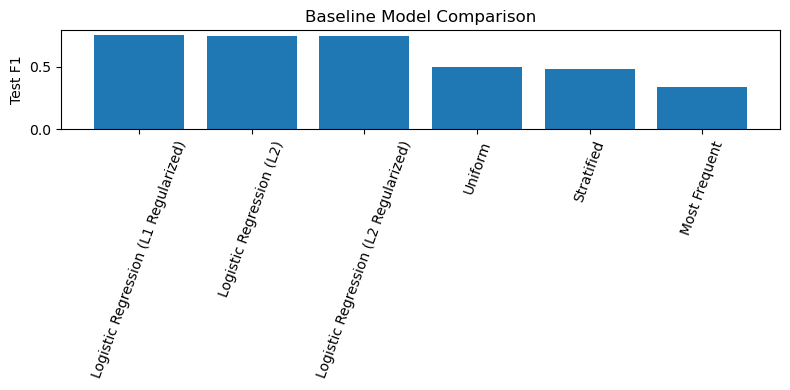

In [36]:
plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["F1_test"])
plt.ylabel("Test F1")
plt.title("Baseline Model Comparison")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

The logistic models did way better than all the dummy ones, which were basically stuck around 50% accuracy. The L1 version did a little better than the L2 ones, but not by a huge amount. Overall it shows the questions do have real signal for predicting the grit classes.
